# Математика для Data Science.
# Домашнее задание №1.

Загрузим датасет о ценах на дома в Бостоне. 

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import cv2
import math
from numpy import (array, dot, arccos, clip)
from numpy.linalg import norm
print(boston.data.shape)
print(load_boston()['DESCR'])
data_dz = pd.read_csv(load_boston()['filename'], skiprows=1)
data_dz.head(15)

(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - P

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [26]:
isinstance(load_boston(), dict)
load_boston().keys()
#load_boston()['data'].shape
#load_boston()['target'].shape
#load_boston()['feature_names']
load_boston()['filename']
df = pd.DataFrame(load_boston()['data'], columns=load_boston()['feature_names'])
df['MEDV'] = load_boston()['target']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Каждый дом - это вектор в 13-мерном пространстве. 
Написать код для подсчета скалярного произведения двух первых домов из датасета.

In [3]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

np.sum(x1*x2)

np.dot(x1,x2)
df.loc[[1]]

NameError: name 'df' is not defined

In [4]:
x1,x2

(array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]),
 array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]))

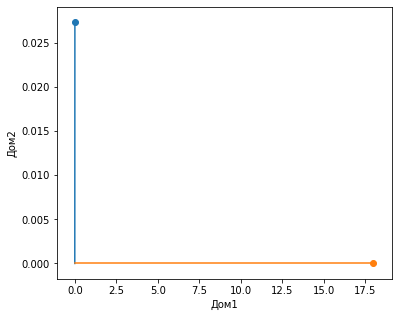

In [5]:
# fig = plt.figure(figsize=(10, 10))
#ax = fig.gca(projection='3d')
fig, ax = plt.subplots(figsize=(6,5)) 

x = np.array(x1)
y = np.array(x2)

ax.plot([0,x[0]], [0,y[0]])
ax.plot([0,x[1]], [0,y[1]])


ax.scatter(x[0], y[0])
ax.scatter(x[1], y[1])


ax.set_xlabel('Дом1')
ax.set_ylabel('Дом2')


plt.show()

этап 2: взять два атрибута и посчитать скалярное произведение двух векторов (2 дома), начертить 2 дома как вектора в двухмерном пространстве, и сравниваем графически и через скалярное произведение.


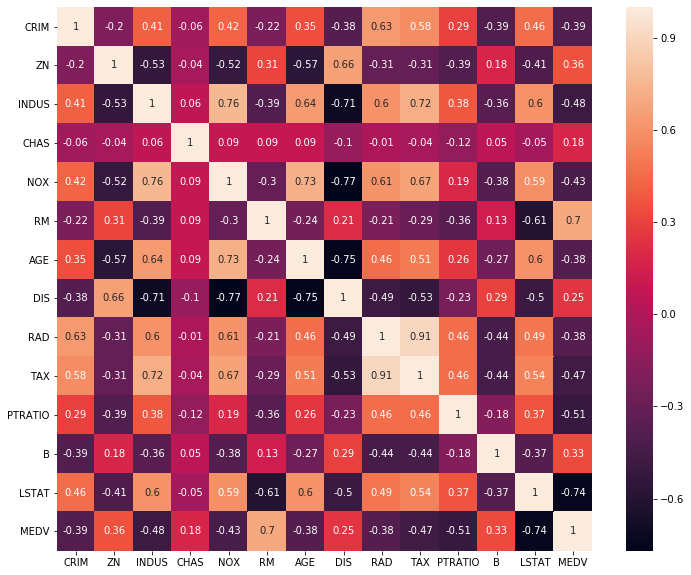

In [32]:
correlation_matrix = data_dz.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

Нарисовать два дома в 3-мерном пространстве (атрибуты выбрать самостоятельно)

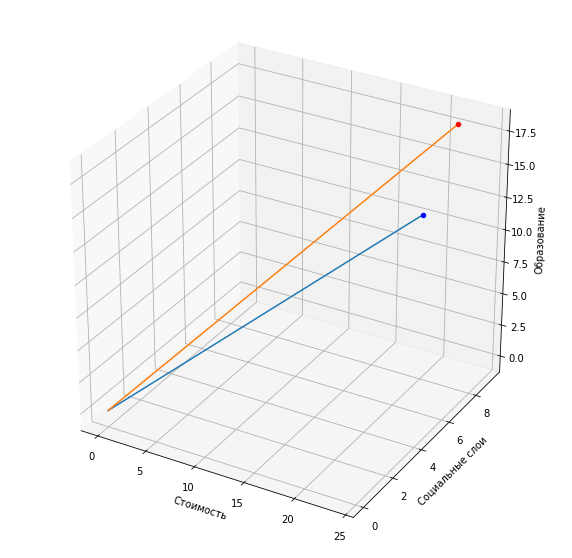

In [86]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array(data_dz['MEDV'])
y = np.array(data_dz['LSTAT'])
z = np.array(data_dz['PTRATIO'])

ax.plot([0,x[0], [0,y[0]], [0,z[0]])
ax.plot([0,x[1]], [0,y[1]], [0,z[1]])
'''ax.plot([0,x[0]], [0,y[0]], [0,z[0]])
ax.plot([0,x[1]], [0,y[1]], [0,z[1]])
ax.plot([0,x[2]], [0,y[2]], [0,z[2]])

ax.scatter(x[0], y[0], z[0], c='b', marker='o')
ax.scatter(x[1], y[1], z[1], c='r', marker='o')
ax.scatter(x[2], y[2], z[2], c='g', marker='o')'''

ax.scatter(x[0], y[0], z[0], c='b', marker='o')
ax.scatter(x[1], y[1], z[1], c='r', marker='o')


ax.set_xlabel('Стоимость')
ax.set_ylabel('Социальные слои')
ax.set_zlabel('Образование')

plt.show()

Найти косинус угла между векторами x1 и x2, где x1 и x2 - это два дома из 2ух атрибутов, полученных на этапе 2.

In [34]:
np.dot(x1,x2)/(np.linalg.norm(x1)*np.linalg.norm(x2))

0.994296998616362

Найти расстояние между точками x1 и x2.

In [35]:
np.linalg.norm(x1 - x2)

58.955079696240766

# Задание повышенного уровня.

Задан объект в пространстве 2D. 
Изменить положение объекта (сместить по оси x на 300 пикселей, по оси y на 200 пикселей).

(-200, 200)

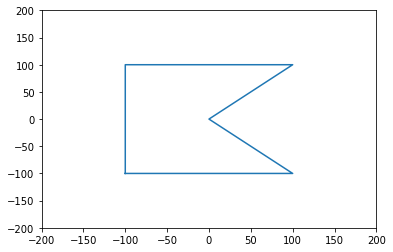

In [44]:
import numpy as np
import matplotlib.pyplot as plt

A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

(0, 500)

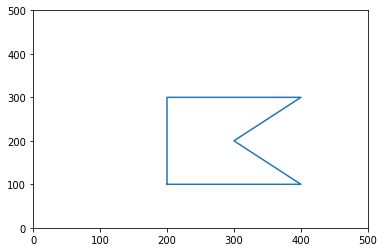

In [45]:
C = A.copy()
#C = np.array(A) + [300,200]
#берем все строки и 0 - означает, что только по x работаем, а 1 - по у - те второй столбец
C[:, 0]+=300
C[:, 1]+=200
x = C[:,0]
y = C[:,1]
plt.plot(x, y)
plt.ylim([0, 500])
plt.xlim([0, 500])

Уменьшить объект в два раза.

[[-50 -50   0]
 [-50  50   0]
 [ 50  50   0]
 [  0   0   0]
 [ 50 -50   0]
 [-50 -50   0]]


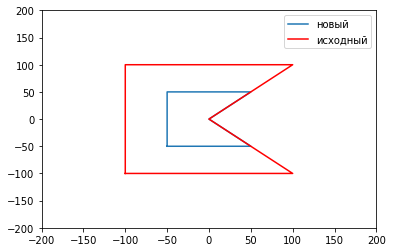

In [148]:
TransformArray = np.array([
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 0.5]
])
B = []
for point in A:
  new_point=np.dot(TransformArray,np.transpose(point))
  B.append(new_point)
B = np.array(B).astype(int)
print(B)
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])

Повернуть на 130 градусов.

[[  70  122    1]
 [ 122  -70    1]
 [ -70 -122    1]
 [   0    0    1]
 [-122   70    1]
 [  70  122    1]]


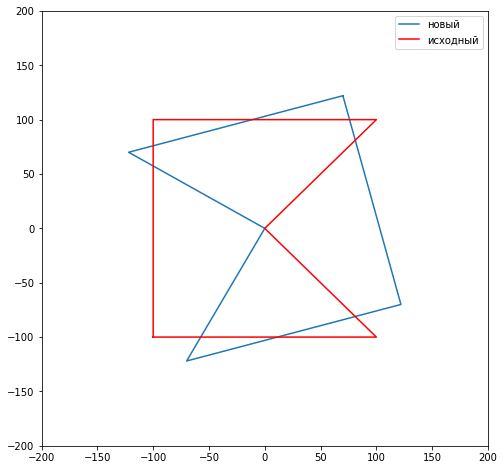

In [149]:
from math import cos, sin, pi

theta = 130 * 180/pi
TransformArray = np.array([
    [cos(theta), sin(theta), 0],
    [-sin(theta), cos(theta), 0],
    [0, 0, 1]
])
B = []
for point in A:
  new_point=np.dot(TransformArray,np.transpose(point))
  B.append(new_point)
B = np.array(B).astype(int)
print(B)
plt.figure(
    figsize=(8, 8),
    )
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])

Отразить объект относительно прямой y=x

(-500, 500)

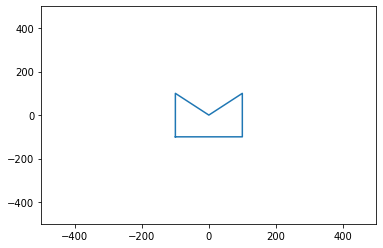

In [49]:
C = A.copy()
C[:, 0],C[:, 1]=C[:, 1].copy(),C[:, 0].copy()
x = C[:,0]
y = C[:,1]
plt.plot(x, y)
plt.ylim([-500, 500])
plt.xlim([-500, 500])

Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1,2)